<img style="float: right; margin: 0px 0px 15px 15px;" src="https://cdn.pixabay.com/photo/2013/07/12/19/02/bunsen-burner-154235_1280.png" width="200px" height="100px" />

# PROYECTO MODULO 2 #

> Realizado por Andrea Camacho y Mariana Artemisa Diaz Meza

> Fecha: 26 de octubre de 2022

> Profesor: Carlos Muro

> Materia: Simulacion matematica
---

## Objetivos del proyecto

### Objetivo general

Conocer el área determinada de dos zonas que generada un mechero Bunsen con entrada de aire y la temperatura producida.

### Objetivo especifico

Con conocimientos previos de esterilización en laboratorios, se va a buscar un área en la flama que nos pueda ayudar en este procedimiento.

Por medio de la integración Montecarlo y la variable de Bernoulli para saber con precisión el área que tenemos disponible para realizar la esterilización de instrumentos como asas bacteriológicas. 

 ---

## Modelo del problema

Para crear una función que modele dos secciones de una flama de fuego, se realizaron dos gráficas en Excel con $9$ puntos cada uno con valores de $x$ de $0$ a $4$ en saltos de $0.5$.

Al unir estos puntos en cada gráfica se formó una función cuadrática *girada* y desplazada del origen. Después se obtuvo una función polinómica de grado dos del mismo programa.

* Puntos para la flama grande

$x$|$y$
:----|----
0|-35
0.5|-7.5
1|10
1.5|17.5
2|15
2.5|2.5
3|-20
3.5|-52.5
4|-95


* Puntos para la flama pequeña

$x$|$y$
:----|----
0|-16
0.5|-5
1|2
1.5|5
2|4
2.5|-1
3|-10
3.5|-23
4|-40


Debido a que los valores en el eje $y$ no presentaban importancia, se tomaron los límites de $0.5\leq x \leq 3$ y de $0\leq y \leq 6$ para la primera gráfica (flama pequeña) y de $0.5\leq x \leq 2.5$, $0\leq y \leq 18$ para la segunda gráfica. Lo que nos darían las gráficas resultantes:

* Gráfica de la flama pequeña
 
[Descarga enlace para visualizar](https://iteso01-my.sharepoint.com/:i:/g/personal/nt726652_iteso_mx/EZZGVO3wbKpArjCfHNs1pdUB6dXloC9f5IJbDlv5tB9xqQ?e=9AumOL)

* Gráfica de la flama grande

[Descarga enlace para visualizar](https://iteso01-my.sharepoint.com/:i:/g/personal/nt726652_iteso_mx/EevzXIEW85tOh0yu6BtdecIBjJlcHkKQpGgz2V5n_05Q2A?e=N9gfvG)

* Flama grande y pequeña en una sola gráfica simulando el mechero Bunsen

[Descarga enlace para visualizar](https://iteso01-my.sharepoint.com/:i:/g/personal/nt726652_iteso_mx/ESfvuLMSxc9Jg8Hl5nP_KlwBwhYvKzbyEJS60eMr5-VLjA?e=i9i2ch)

Se puede observar que cada gráfica de las flamas de fuego individuales presentan una ecuación que cumple con los puntos graficados. Ambas ecuaciones resultantes se integrarán por el método de Montecarlo para conocer su área y relacionarlas con el calor que producen en el mechero Bunsen.

## Solucion del problema


In [52]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
# ----- > Región de la flama grande < -----
def region1(x1,y1):
    return y1 <= -20*x1**2+65*x1-35

In [128]:
# ----- > Región de la flama pequeña < -----
def region2(x2,y2):
    return y2 <= -8*x2**2+26*x2-16

In [129]:
# ----- > Función de Montecarlo para la flama grande < -----
def montecarlo1(region1,a1,b1,a2,b2,N):
    ux1=np.random.uniform(a1,b1,N)           
    uy1=np.random.uniform(a2,b2,N)       
    B1=region1(ux1,uy1)                     
    AR=(b1-a1)*(b2-a2)                    
    return np.mean(B1)*AR

In [130]:
# ----- > Función de Montecarlo para la flama pequeña < -----
def montecarlo2(region2,a1,b1,a2,b2,N):
    ux2=np.random.uniform(a1,b1,N)          
    uy2=np.random.uniform(a2,b2,N)           
    B2=region2(ux2,uy2)                       
    AR=(b1-a1)*(b2-a2)                  
    return np.mean(B2)*AR

In [143]:
# ----- > Límites de integración (ver 'Visualización del problema') < -----
a1,b1 = 0.6,2.6
a2,b2 = 0,18
AR=(b1-a1)*(b2-a2)
N = np.logspace(1,5,5).astype('int')
tabla = pd.DataFrame(index=N,columns=['Área 1','Área 2','Error A1','Error A2','Suma'])
AR = (b1-a1)*(b2-a2)
for n in N:
    tabla.loc[n,'Área 1'] = montecarlo1(region1,a1,b1,a2,b2,n)
    tabla.loc[n,'Área 2'] = montecarlo2(region2,a1,b1,a2,b2,n)
    th1 = tabla.loc[n,'Área 1']/AR
    th2 = tabla.loc[n,'Área 2']/AR
    tabla.loc[n,'Error A1'] = np.sqrt(th1*(1-th1)/n)
    tabla.loc[n,'Error A2'] = np.sqrt(th2*(1-th2)/n)
    tabla.loc[n,'Suma'] = tabla.loc[n,'Área 1']+tabla.loc[n,'Área 2']
tabla

,Área 1,Área 2,Error A1,Error A2,Suma
10,25.2,3.6,0.144914,0.0948683,28.8
100,23.04,5.76,0.048,0.0366606,28.8
1000,22.716,5.328,0.0152591,0.0112292,28.044
10000,22.4856,5.49,0.00484226,0.00359505,27.9756
100000,22.4586,5.43564,0.00153187,0.00113222,27.8942


## Visualizacion del problema

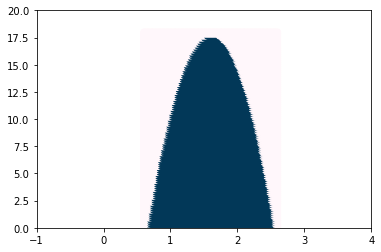

In [177]:
# ----- > Área de la flama grande < -----
plt.scatter(X,Y,c=region1(X,Y),cmap='PuBu')
plt.xlim([-1,4])
plt.ylim([0,20])
plt.grid()
plt.grid()

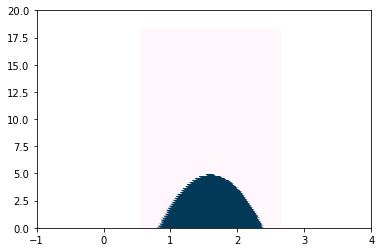

In [178]:
# ----- > Área de la flama pequeña < -----
plt.scatter(X,Y,c=region2(X,Y),cmap='PuBu')
plt.xlim([-1,4])
plt.ylim([0,20])
plt.grid()
plt.grid()

## Conclusiones


Se pudo identificar la zona en el cuál se puede esterilizar material de laboratorio que es la zona reductora para que alcance alrededor de $1,000$°C, teniendo así que con ayuda de la integración Montecarlo se obtuvieron los resultados de un área de $22.46$ para la flama producida en total y un área de $5.44$ para la zona en la que debe ser posicionada el asa bacteriológica. 

## Referencias

N.A. Como se esteriliza un asa de inoculacion? (2020, 16 octubre). From: https://respuestacorta.com.mx/como-se-esteriliza-un-asa-de-inoculacion/